<a href="https://colab.research.google.com/github/Ayanlola2002/Analyticsvidyah/blob/master/club_mahindra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

#load important libraries
import pandas as pd 
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt      
import warnings

In [0]:
#unzipping the train folder
from shutil import unpack_archive
unpack_archive('train_5CLrC8b.zip')

In [0]:
#unzipping the train folder
from shutil import unpack_archive
unpack_archive('test_Jwt0MQH.zip')

In [0]:
# reading the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [91]:
# getting the shapes of the datasets
print("Shape of Train :", train_data.shape)
print("Shape of Test :", test_data.shape)

Shape of Train : (341424, 24)
Shape of Test : (146765, 23)


In [92]:
# lets look at the head of the train

train_data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [0]:
#copy of original dataset
df_train = train_data.copy()
df_test = test_data.copy()

In [0]:
#save id column
train_id = train_data['reservation_id']
test_id = test_data['reservation_id']

In [0]:
#Now drop the  'reservation id' colum since it's unnecessary for  the prediction process.
df_train.drop("reservation_id", axis = 1, inplace = True)
df_test.drop("reservation_id", axis = 1, inplace = True)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 23 columns):
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  336660 non-null float64
state_code_resort                     3414

In [97]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 22 columns):
booking_date                146765 non-null object
checkin_date                146765 non-null object
checkout_date               146765 non-null object
channel_code                146765 non-null int64
main_product_code           146765 non-null int64
numberofadults              146765 non-null int64
numberofchildren            146765 non-null int64
persontravellingid          146765 non-null int64
resort_region_code          146765 non-null int64
resort_type_code            146765 non-null int64
room_type_booked_code       146765 non-null int64
roomnights                  146765 non-null int64
season_holidayed_code       146730 non-null float64
state_code_residence        144505 non-null float64
state_code_resort           146765 non-null int64
total_pax                   146765 non-null int64
member_age_buckets          146765 non-null object
booking_type_code           146

In [0]:
target = df_train['amount_spent_per_room_night_scaled']  #target variable

#df_train['training_set'] = True #assing an extra variable to training and testing dataset before joining them
#df_test['training_set'] = False
#df_full = pd.concat([df_train, df_test]) #concatenate both dataframes prior to E

In [0]:
df_train = df_train.drop('amount_spent_per_room_night_scaled', axis=1) #drop target variable from training dataset

In [100]:
df_train.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'memberid', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],
      dtype='object')

In [42]:
train_Data.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [102]:
# let's see if there are any missing values (i.e. NA)
print("There are {} NA values in 'amount_spent_per_room_night_scaled'".format(target.isnull().values.sum()))

There are 0 NA values in 'amount_spent_per_room_night_scaled'


Target varriable analysis

In [0]:
# let's get some stats on the 'target' variable
minimum_amount_spent_per_room = np.min(target)
maximum_amount_spent_room = np.max(target)
mean_amount_spent_per_room = np.mean(target)
median_amount_spent_per_room = np.median(target)
std_amount_spent_per_room = np.std(target)

In [104]:
# Show the calculated statistics
print("Statistics for the supplied house prices training dataset:")
print("Minimum price: ${:,.2f}".format(minimum_amount_spent_per_room))
print("Maximum price: ${:,.2f}".format(maximum_amount_spent_room))
print("Mean price: ${:,.2f}".format(mean_amount_spent_per_room))
print("Median price ${:,.2f}".format(median_amount_spent_per_room))
print("Standard deviation of prices: ${:,.2f}".format(std_amount_spent_per_room))

Statistics for the supplied house prices training dataset:
Minimum price: $1.60
Maximum price: $10.82
Mean price: $7.72
Median price $7.86
Standard deviation of prices: $1.09


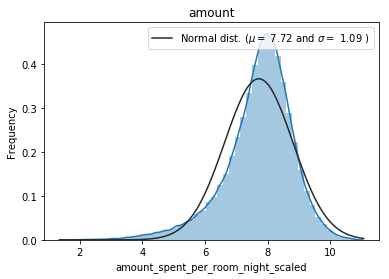

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew



# let's plot a histogram with the fitted parameters used by the function
sns.distplot(target , fit=norm);
# get mean and standard deviation
(mu, sigma) = norm.fit(target)
# add legends to the plot
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('amount');

In [41]:
print("Skewness: %f" % target.skew())

Skewness: -0.923229


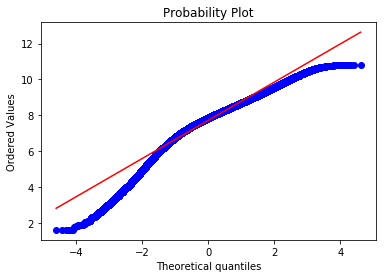

In [106]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()


 mu = 2.16 and sigma = 0.14



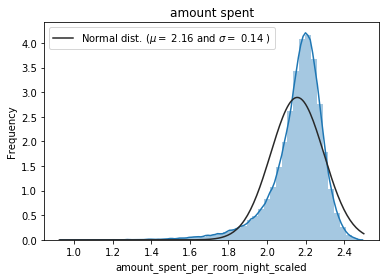

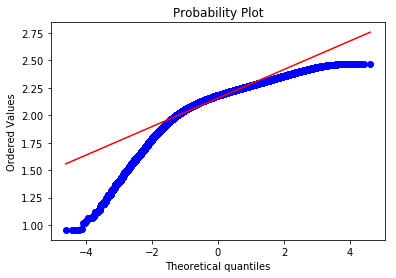

In [107]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
target_log = np.log1p(target)

#Check the new distribution 
sns.distplot(target_log , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target_log)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('amount spent')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target_log, plot=plt)
plt.show()

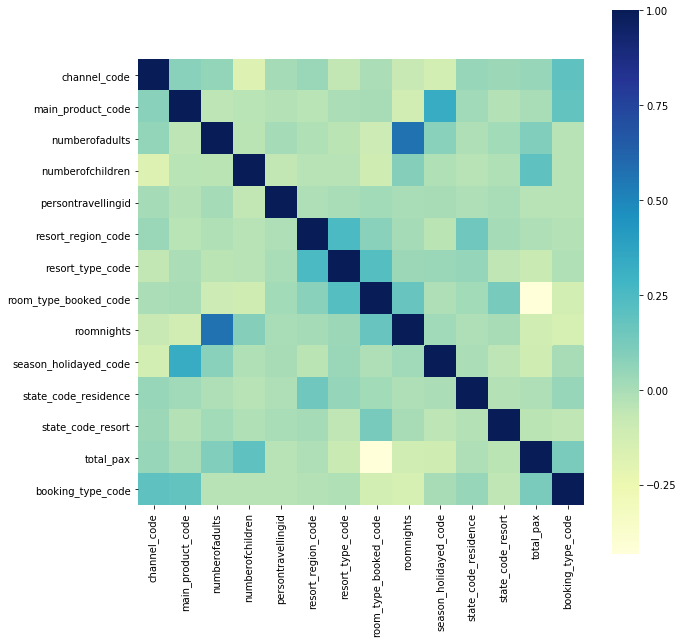

In [108]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,square=True, cmap="YlGnBu");